In [1]:
# STEP 1: IMPORT LIBRARIES
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# ✅ FIXED STYLE ERROR
# The old 'plt.style.use("seaborn")' no longer works.
sns.set_theme(style="whitegrid")

In [6]:
# -------------------------------
# Make sure the CSV file is in the same folder as your notebook
data = pd.read_csv("c://Users//prana//Downloads//Unemployment in India.csv")
print("✅ Dataset Loaded Successfully!\n")
print(data)

✅ Dataset Loaded Successfully!

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN

In [7]:

# Display first few rows
print("📄 First 5 Rows:")
print(data.head(), "\n")

📄 First 5 Rows:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural   



In [8]:
# STEP 3: CHECK DATA INFORMATION
# -------------------------------
print("📊 Dataset Info:")
print(data.info(), "\n")


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None 



In [9]:
print("🧮 Missing Values:")
print(data.isnull().sum(), "\n")


🧮 Missing Values:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64 



In [12]:
# STEP 4: CLEAN & PREPARE DATA
# -------------------------------
data.columns = [
    'Region', 'Date', 'Frequency', 
    'Estimated Unemployment Rate (%)',
    'Estimated Employed', 
    'Estimated Labour Participation Rate (%)', 
    'Area'
]
print(data.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [13]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

C:\Users\prana\AppData\Local\Temp\ipykernel_11088\2856061225.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [14]:
# Check unique values
print("🌍 Unique Regions:", data['Region'].unique())
print("🏙️ Unique Areas:", data['Area'].unique(), "\n")

🌍 Unique Regions: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']
🏙️ Unique Areas: ['Rural' nan 'Urban'] 



In [15]:
# STEP 5: EXPLORATORY DATA ANALYSIS (EDA)
# -------------------------------
print("📈 Statistical Summary:\n", data.describe(), "\n")

# Average unemployment rate by region
region_unemployment = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()


📈 Statistical Summary:
                                 Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                 

C:\Users\prana\AppData\Local\Temp\ipykernel_11088\1467213308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=region_unemployment, palette='coolwarm')


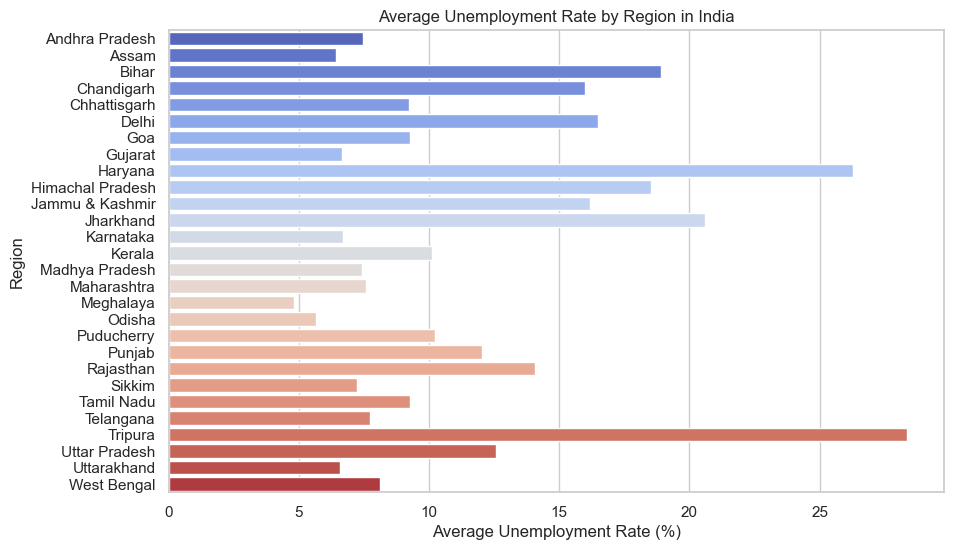

In [22]:

# STEP 6: DATA VISUALIZATION


# 1️⃣ Unemployment Rate by Region
plt.figure(figsize=(10,6))
sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=region_unemployment, palette='coolwarm')
plt.title('Average Unemployment Rate by Region in India')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_11088\2253173635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=data, palette='Set2')


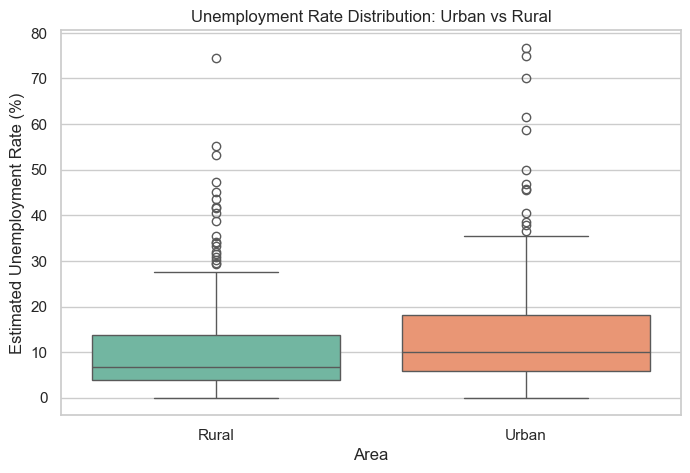

In [23]:

# 2️⃣ Area-wise Unemployment Comparison
plt.figure(figsize=(8,5))
sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=data, palette='Set2')
plt.title('Unemployment Rate Distribution: Urban vs Rural')
plt.show()

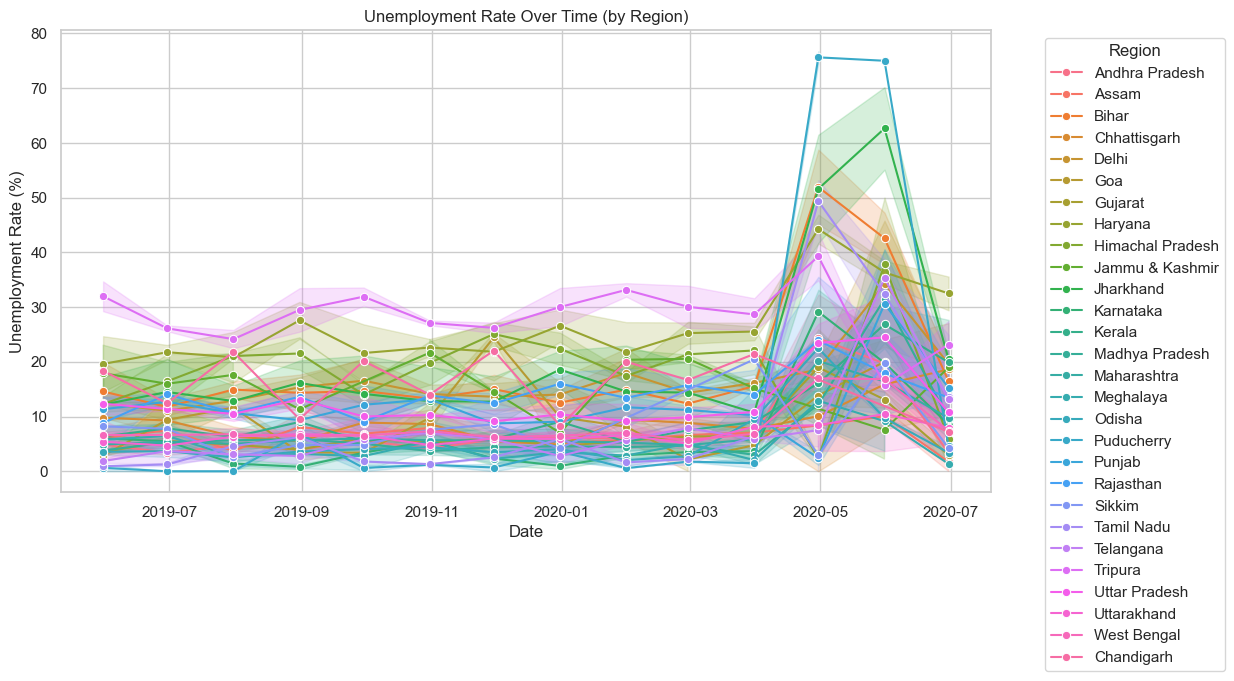

In [24]:
# 3️⃣ Time Series Trend
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data, hue='Region', marker='o')
plt.title('Unemployment Rate Over Time (by Region)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


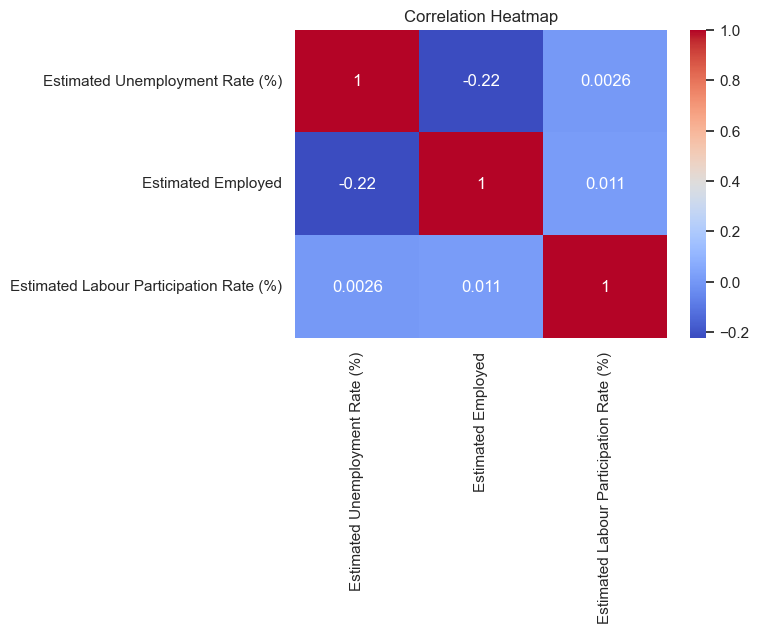

In [25]:
# 4️⃣ Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [26]:
# STEP 7: INSIGHTS
# -------------------------------
print("🔍 Key Insights:")
print("- Some regions experienced significantly higher unemployment rates during COVID-19.")
print("- Urban areas generally showed higher unemployment than rural areas.")
print("- The unemployment rate peaked around mid-2020 lockdown months.")
print("- There’s a moderate link between unemployment and labour participation rate.")

print("\n✅ Analysis Completed Successfully!")

🔍 Key Insights:
- Some regions experienced significantly higher unemployment rates during COVID-19.
- Urban areas generally showed higher unemployment than rural areas.
- The unemployment rate peaked around mid-2020 lockdown months.
- There’s a moderate link between unemployment and labour participation rate.

✅ Analysis Completed Successfully!
